### Machine Learning

---

#### ### Supervised Machine Learning (data + labels)

- **Regression** (Regression, Lasso, Ridge)
  - Simple Linear Regression
  - Multiple Linear Regression
  - Polynomial Regression

- **Classification**
  - Binary Classification (0,1) (T/F) (CAT/DOG)
  - Multiclassification (More than 2 classes)

---

#### ### Unsupervised Machine Learning (data)

- Clustering
- Dimensionality Reduction

---

#### ### Semi-Supervised Machine Learning (data + labels + autoencoded)

---

#### ### Reinforcement Learning


In [2]:
import pandas as pd
data = pd.read_csv("weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Step 2: Separate Input Output Data
     - Data and Labels

In [5]:
X = data.Height 
X.values   # wrong input

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [6]:
X = data[["Height"]]
X.values   # right 

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [7]:
X = data[["Height"]]
y = data[["Weight"]]

# Step 3: Split Training and Testing Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=0, test_size = .40)

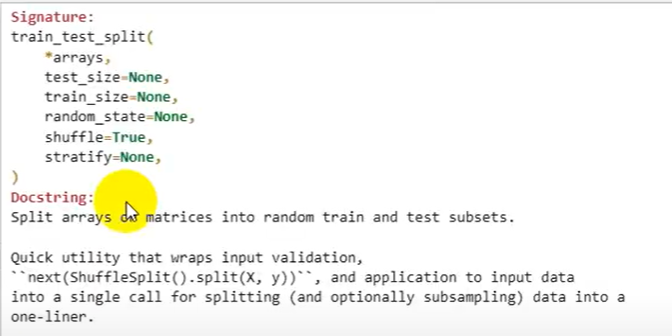   By default test and train size 25%

In [14]:
import random

In [17]:
random.seed(1234)
random.randint(1,10)

8

Great question! Let's break down the `random_state` parameter in:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)
```

---

## 🔹 What is `random_state`?

`random_state` is a **seed** value for the **random number generator** used by `train_test_split`.

Since `train_test_split` randomly shuffles and splits your data into training and testing sets, setting a `random_state` ensures:

### ✅ **Reproducibility**

Every time you run the code with the same `random_state`, **you get the same split** of training and test data.

---

## 🧪 Example Without `random_state`

```python
train_test_split(X, y, test_size=0.4)
```

* Each time you run this, the split will be different.

---

## 🧪 Example With `random_state=0`

```python
train_test_split(X, y, test_size=0.4, random_state=0)
```

* Every time you run this, you get the **same** training and testing sets.

You can use any integer value:

* `random_state=0`, `random_state=42`, etc.

The number itself doesn’t matter — it just **locks the shuffle pattern**.

---

## 💡 When to Use It?

* For **experiments and debugging**, so your results are consistent.
* When **sharing code**, so others get the same split as you.

---

Would you like to see how changing `random_state` changes the output split?


### data shufflining is done for removing bias so male data mixes warna imbalance hojaega


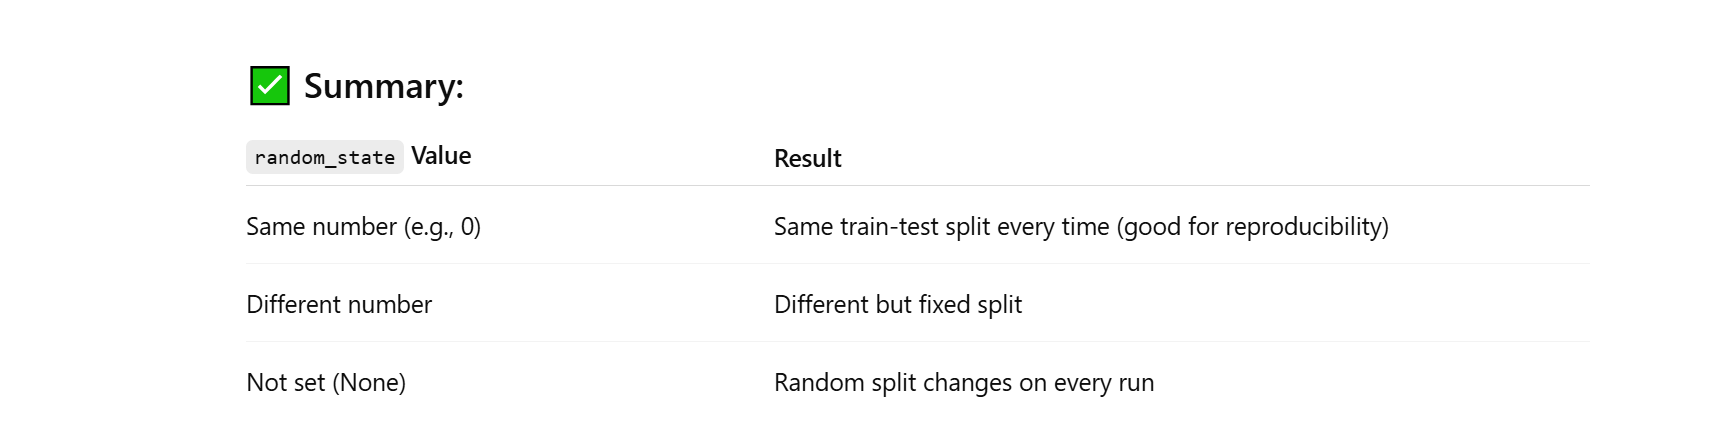

# Step 4: Model Selection

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Step 5: Model Training (Fit Karna)

In [24]:
# Supervised Learning data + ans
model.fit(X_train, y_train) 

LinearRegression()

In [25]:
model.coef_

array([[7.71316805]])

In [26]:
model.intercept_

array([-350.4837037])

In [27]:
# our predicted line:
# W = 7.71316805 * H - 350.4837037

# Step 6: Prediction on Training Data 

In [29]:
y_pred_train = model.predict(X_train)

In [30]:
pd.DataFrame({"y_train": y_train , "y_pred_train": y_pred_train})

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
y_train   # part of dataframe not numpy array (reshape can't be applied on it)

In [ ]:
y_train.values  # apply reshape on it

In [ ]:
y_pred_train  # it is a numpy array (can be converted to 1d itself)

In [ ]:
y_train.values.reshape(6000 , ) #converted to numpy 1d   ( 6000 --> shape ,1d)

In [ ]:
y_pred_train.reshape(6000 , ) # prediction itself are values

In [ ]:
pd.DataFrame({"y_train": y_train.values.reshape(6000 , ) , "y_pred_train": y_pred_train.reshape(6000 , )  })

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
r2_score(y_train, y_pred_train)

**R²** (pronounced *R-squared*) is the **coefficient of determination** — a statistical measure used to evaluate how well a regression model explains the variance in the dependent variable (target).

---

### 🔍 **What does R² tell you?**

It tells you **how much of the variability in the output variable (Y)** is explained by the input variables (X) in your regression model.

---

### 📌 **Formula**:

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

* $SS_{\text{res}}$: Residual sum of squares = $\sum (y_i - \hat{y}_i)^2$
* $SS_{\text{tot}}$: Total sum of squares = $\sum (y_i - \bar{y})^2$

---

### ✅ **Interpretation**:

* $R^2 = 1$: Perfect model; explains all variability.
* $R^2 = 0$: Model explains none of the variability (as bad as predicting the mean).
* $R^2 < 0$: Model performs worse than just predicting the mean (possible with poor fit).

---

### 💡 **Example**:

If $R^2 = 0.85$, it means **85% of the variation in the target** is explained by the model, and **15% is due to other factors** (noise, missing features, etc.).

---

Sure! Let’s walk through a simple example to **calculate R² (coefficient of determination)** step by step.

---

### 📊 Example Data:

| Observation | Actual (y) | Predicted (ŷ) |
| ----------- | ---------- | ------------- |
| 1           | 3          | 2.5           |
| 2           | 4          | 4.3           |
| 3           | 2          | 2.1           |
| 4           | 5          | 4.8           |

---

### Step 1: Compute the **mean of actual values**

$$
\bar{y} = \frac{3 + 4 + 2 + 5}{4} = \frac{14}{4} = 3.5
$$

---

### Step 2: Calculate **Total Sum of Squares (SStot)**

$$
SS_{\text{tot}} = \sum (y_i - \bar{y})^2
= (3 - 3.5)^2 + (4 - 3.5)^2 + (2 - 3.5)^2 + (5 - 3.5)^2
= 0.25 + 0.25 + 2.25 + 2.25 = 5.0
$$

---

### Step 3: Calculate **Residual Sum of Squares (SSres)**

$$
SS_{\text{res}} = \sum (y_i - \hat{y}_i)^2
= (3 - 2.5)^2 + (4 - 4.3)^2 + (2 - 2.1)^2 + (5 - 4.8)^2
= 0.25 + 0.09 + 0.01 + 0.04 = 0.39
$$

---

### Step 4: Compute **R²**

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
= 1 - \frac{0.39}{5.0} = 1 - 0.078 = 0.922
$$

---

### ✅ Final Answer:

$$
\boxed{R^2 = 0.922}
$$

This means **92.2%** of the variance in the actual values is explained by the model.

---

Let me know if you'd like a Python code snippet to compute this from scratch.



In [ ]:
mean_absolute_error(y_train, y_pred_train)

In [ ]:
mean_squared_error(y_train, y_pred_train)

In [ ]:
mean_squared_error(y_train, y_pred_train) ** 0.5

# Step 7: Prediction on Test Data

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_test)

In [ ]:
mean_absolute_error(y_test, y_pred_test)

In [ ]:
# so to deploy create API

In [45]:
def predict1_weight(height):
    return model.predict(height) * 0.453592  # pounds to kgs

In [47]:
height = float(input("Height in feet? "))
print(f"Your weight is : {predict1_weight(height*12)} kgs")  # feet to cms

Height in feet?  34


C:\Users\Tesla Laptops\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=408.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
# error is that the input in model is always 2D
height = float(input("Height in feet? "))
print(f"Your weight is : {predict1_weight([[height*12]])} kgs")  # feet to cms

Height in feet?  45


Your weight is : [[1730.28430886]] kgs


C:\Users\Tesla Laptops\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Now technically we have a issue male and female variation is not accounted for!

In [181]:
X = data[['Gender','Height']] 
X

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


## Encoding: can't give model male female need to encode


In [187]:
data.Gender = [1 if g else 0 for g in data.Gender]

# data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

data

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


In [226]:
x = data[['Gender','Height']] 
x

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
9995,1,66.172652
9996,1,67.067155
9997,1,63.867992
9998,1,69.034243


In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, random_state=12200, test_size = .40)

In [248]:
x_train

,Gender,Height
3939,1,69.569347
5267,1,68.504930
4122,1,65.978976
6066,1,60.647105
2471,1,72.963161
...,...,...
1567,1,70.190769
8433,1,60.900122
3974,1,72.286541
5875,1,61.827278


In [250]:
# equation --> y = m1 gender + m2 height + c

In [252]:
mlr = LinearRegression()

In [254]:
mlr.fit(x_train, y_train)

LinearRegression()

In [256]:
y_pred_train = mlr.predict(x_train)
y_pred_train

array([[186.28587842],
       [178.06245379],
       [158.5475546 ],
       ...,
       [207.27825463],
       [126.47255055],
       [222.53921386]])

In [258]:
r2_score(y_train,y_pred_train)

0.8554430706716698

In [267]:
y_pred_test = mlr.predict(x_test)
y_pred_test

array([[175.0738825 ],
       [124.24476697],
       [152.59674488],
       ...,
       [147.80725033],
       [213.56960799],
       [173.14905914]])

In [271]:
r2_score(y_test,y_pred_test)

0.8546559997233335